# Distance distribution vs $r = \frac{p1}{p2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graph_generation import create_ER
from models import GCN, GCNEmbed
from train import Trainer
from embedding import Embedding

import torch
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

In [2]:
N = 300 # Graph nodes number
Num_grafi_per_tipo = 100 

# Model parameters
hidden_channels = 64

# training parameters
learning_rate=0.01
epochs=200
batch_size=150
percentage_train=0.7

In [3]:
list_pER = [(0.02, 0.6), (0.05, 0.5), (0.1, 0.4), (0.15, 0.35), (0.2, 0.3), (0.23, 0.27), (0.245, 0.255), (0.25, 0.25)]

In [4]:
list_embeddings = []

for p1,p2 in list_pER:
    # prima classe
    grafi_0 = create_ER(N, p1, Num_grafi_per_tipo)
    # seconda classe
    grafi_1 = create_ER(N, p2, Num_grafi_per_tipo)
    dataset_grafi_nx = grafi_0 + grafi_1
    #print(f"{len(dataset_grafi_nx)}")
    dataset_labels = np.array([0]*len(grafi_0) + [1]*len(grafi_1))
    
    model = GCN(hidden_channels=hidden_channels)
    model.to(device)
    #print(model)
    
    trainer = Trainer(model, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)
    trainer.load_dataset(dataset_grafi_nx, dataset_labels, percentage_train=percentage_train)
    trainer.launch_training()
    
    # get embedding of all graphs in dataset
    embed_model = GCNEmbed(model)
    embed_model = embed_model.to(device)
    whole_data = trainer.dataset.dataset_pyg
    all_data_loader = DataLoader(whole_data, batch_size=trainer.dataset.len_data, shuffle=False)
    batch = next(iter(all_data_loader))
    embeddings_array = embed_model(batch.x, batch.edge_index, batch.batch).cpu().detach().numpy()
    
    embeddings = Embedding(embeddings_array, trainer.dataset.labels, (p1,p2))
    embeddings.calc_coppie()
    embeddings.calc_distances()
    list_embeddings.append(embeddings)
    
    epochs += 100

Mean connectivity for each node: 5.995
Mean connectivity for each node: 179.362


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:22<00:00,  8.90it/s]


runs/lr-0.01_epochs200_bs150_layers3/29Apr_12-47-28
Mean connectivity for each node: 14.932
Mean connectivity for each node: 149.548


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:20<00:00,  9.87it/s]


runs/lr-0.01_epochs300_bs150_layers3/29Apr_12-48-23
Mean connectivity for each node: 29.854
Mean connectivity for each node: 119.596


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 10.69it/s]


runs/lr-0.01_epochs400_bs150_layers3/29Apr_12-49-28
Mean connectivity for each node: 44.804
Mean connectivity for each node: 104.729


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:19<00:00, 10.31it/s]


runs/lr-0.01_epochs500_bs150_layers3/29Apr_12-50-43
Mean connectivity for each node: 59.848
Mean connectivity for each node: 89.747


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:19<00:00, 10.34it/s]


runs/lr-0.01_epochs600_bs150_layers3/29Apr_12-52-12
Mean connectivity for each node: 68.786
Mean connectivity for each node: 80.724


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 10.60it/s]


runs/lr-0.01_epochs700_bs150_layers3/29Apr_12-53-54
Mean connectivity for each node: 73.261
Mean connectivity for each node: 76.276


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 10.59it/s]


runs/lr-0.01_epochs800_bs150_layers3/29Apr_12-55-48
Mean connectivity for each node: 74.745
Mean connectivity for each node: 74.811


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 10.63it/s]


runs/lr-0.01_epochs900_bs150_layers3/29Apr_12-57-56


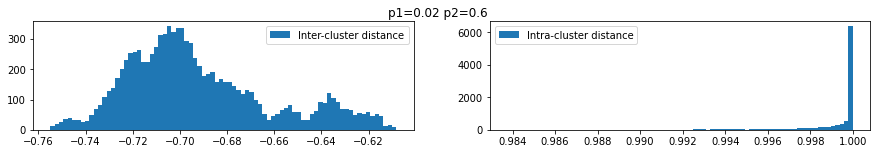

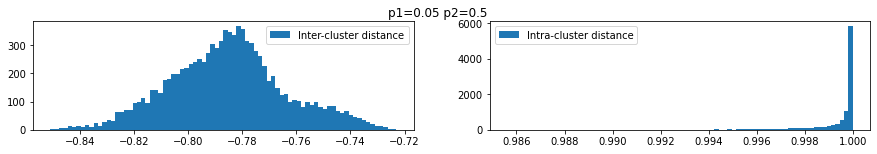

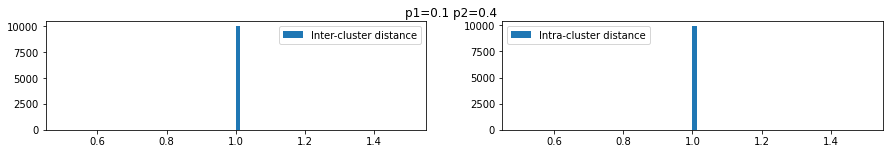

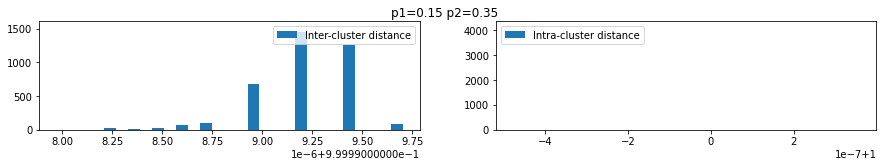

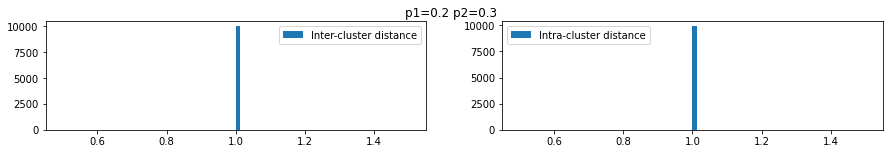

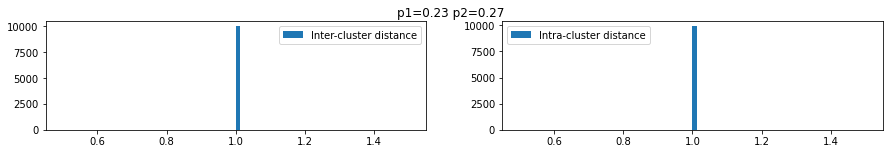

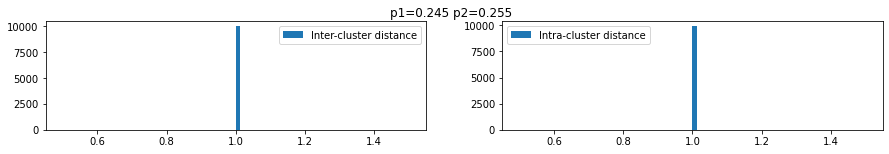

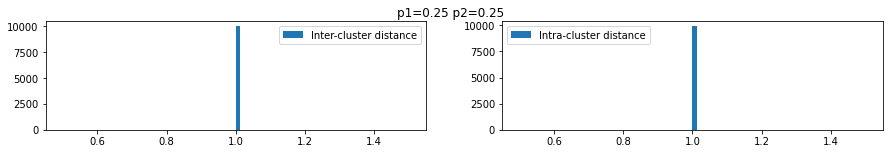

In [5]:
for emb in list_embeddings:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,2)) #,  sharey=True)
    fig.suptitle(f"p1={emb.probabilities_ER[0]} p2={emb.probabilities_ER[1]}")
    ax1.hist(emb.inter_dists, bins=80, label=f"Inter-cluster distance")
    ax1.legend(loc="upper right")
    ax2.hist(emb.intra_dists, bins=80, label=f"Intra-cluster distance")
    ax2.legend(loc="upper left")
    plt.show()